## Greenhouse Gas Emissions Analysis

### Motivation and Goal

In this project, our primary goal is to dive in the greenhouse gas emissions data and look for patterns in emissions by various sectors and nations. We will extend the analysis to include the population and the Gross Domestic Product, to account for the varying energy requirements. We particularly want to compare the most polluting nations with those at the highest risk and see if the innocents are paying the price. Moreover, it will be interesting to see if countries responsible for most emissions are also proportionately contributing to the climate funds. Finally, we will end with the time-trend of global emissions and impacts of small actions that we can take!

### Analysis (Data, apporoach, and results)

First, import all the required libraries.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from math import floor

%matplotlib inline

### Greenhouse Gas Emissions Data

This file contains data about various greenhouse gas emissions for 186 countries from 1990 to 2012. Here, there are 4 gases that are accounted for - CO2, CH4, N2O, and F-Gas. The emission data is verticalized sector-wise as well. The sectors taken into account are Energy, Industry, Agriculture, Waste, Land Use Change and Forestry and Bunker Fuels. The energy sector is further broken down into Electricity/Heat, Manufacturing/Construction, Transportation, Other Fuel Combustion, and Fugitive Emissions.<br><br>
Read the data from the CSV file. Fill in all the missing values by -1. The missing values are mostly for really small and undeveloped countries, so it does not affect our analysis. Also, we remove two rows from the data corresponding to a group of countries, namely "European Union (28)", and "European Union (15)".

In [26]:
# Data reading
emission = pd.read_csv("CAIT Country GHG Emissions.csv", encoding = "latin-1")

# Data cleansing
emission.columns = emission.iloc[1]
emission = emission.iloc[2:]
emission = emission.fillna("-1")
emission = emission[emission['Country'] != "European Union (28)"]
emission = emission[emission['Country'] != "European Union (15)"]

Change the data type of Year and Emissions to integer and float, respectively. Also, change the long column name for simplicity while extracting the data. Further, it displays the first few rows of the data to help visualize how the data looks like (after all the pre-processing).

In [27]:
# Rename column
emission = emission.rename(columns = {'Total GHG Emissions Including Land-Use Change and Forestry (MtCO?e?)':'Grand Total Emissions'})

# Change datatypes
emission['Year'] = emission['Year'].apply(lambda v: int(v))
emission['Grand Total Emissions'] = emission['Grand Total Emissions'].apply(lambda v: float(v))

# Print the dataframe
emission.head()

1,Country,Year,Total GHG Emissions Excluding Land-Use Change and Forestry (MtCO2e),Grand Total Emissions,Total CO2 (excluding Land-Use Change and Forestry) (MtCO2),Total CH4 (MtCO2e),Total N2O (MtCO2e),Total F-Gas (MtCO2e),Total CO2 (including Land-Use Change and Forestry) (MtCO2),Total CH4 (including Land-Use Change and Forestry) (MtCO2e),...,Industrial Processes (MtCO2e),Agriculture (MtCO2e),Waste (MtCO2e),Land-Use Change and Forestry (MtCO2),Bunker Fuels (MtCO2),Electricity/Heat (MtCO2),Manufacturing/Construction (MtCO2),Transportation (MtCO2),Other Fuel Combustion (MtCO2e),Fugitive Emissions (MtCO2e)
2,Afghanistan,1990,15.2969,15.9612,2.9907,9.3098,2.9943,0.0022,3.654722,9.309910807,...,0.0571,7.3512,4.039,0.6643,-1,-1,-1,-1,-1,1.2556
3,Afghanistan,1991,15.3514,15.3516,2.7412,9.5144,3.0922,0.0036,2.741202,9.514510824,...,0.0586,7.6393,4.22,0.0002,-1,-1,-1,-1,-1,1.0226
4,Afghanistan,1992,14.0513,14.0515,1.4252,9.5697,3.0513,0.005,1.425242,9.569810841,...,0.0637,7.6392,4.4011,0.0002,-1,-1,-1,-1,-1,0.6026
5,Afghanistan,1993,14.0649,14.0650,1.352,9.6081,3.0983,0.0065,1.352016,9.608190857,...,0.0651,7.7102,4.5822,0.0002,-1,-1,-1,-1,-1,0.414
6,Afghanistan,1994,14.0222,14.0224,1.2971,9.7873,2.93,0.0079,1.297056,9.787360874,...,0.0665,7.7066,4.7633,0.0002,-1,-1,-1,-1,-1,0.2473


### Emissions Timeline Since 1990

We start by analyzing the trend of the world's greenhouse gas emissions. For that, we create a timeline chart (a line graph with the x-axis as time) showing global emissions for each year.

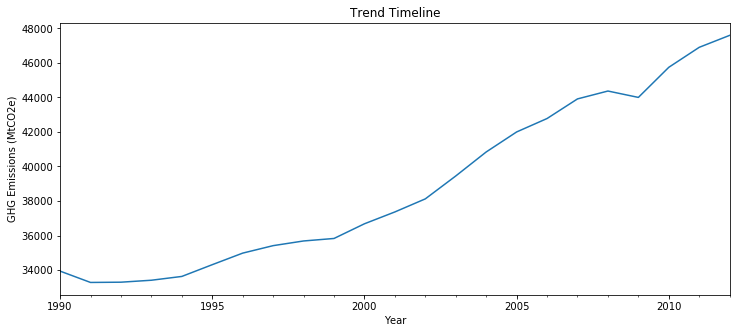

In [28]:
# Plots a line graph to show how GHG emissions have risen from 1990 to 2012 in the world
emission_world = emission[emission['Country']=='World']
emission_world = emission_world[['Year','Grand Total Emissions']]
emission_world.set_index(pd.to_datetime(emission_world['Year'], format="%Y"), inplace=True)

# Plotting
emission_world['Grand Total Emissions'].plot(figsize=(12,5), title="Trend Timeline")
plt.ylabel("GHG Emissions (MtCO2e)")
plt.show()

Creating an excel file which acts as an input for Tableau. Extracting the emission data for 2012. and removing 'World' to get emissions for all countries.

In [29]:
# Extracting data for tableau. Taking emission dataa for 2012 and exporting it to an excel.
map_tableau = emission[emission['Year'] == 2012][['Country','Grand Total Emissions']].set_index('Country')
map_tableau = map_tableau.drop(['World'])
map_tableau.to_excel('Map Data.xlsx')

The plot shows the reality as well as the gravity of the human intervention with the Earth's atmosphere. We can see a steady increase in greenhouse emissions, without any indication of flattening even now. Over the last two decades, annual emissions have increased by almost 40%. Even though the mankind is boasting of moving to the clean energy sources, our emissions are still going up.<br><br>
Before digging deep lets see how the 'emissions map' looks like. It seems greenhouse gas emissions are dominated by a few countries. Lets see the real picture.

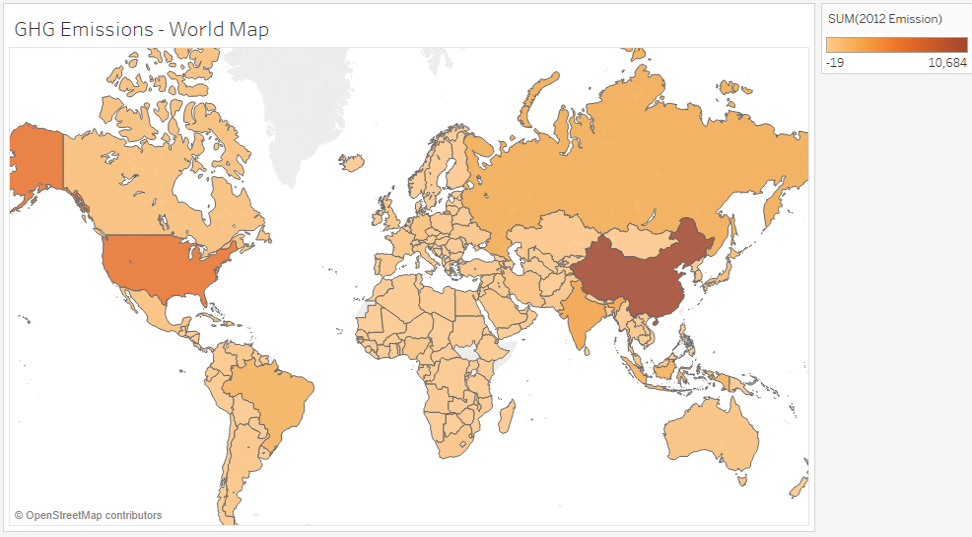

### Emissions Disparity Across Nations

Here, we wish to analyze the disparity among countries in the greenhouse gas emissions. For this purpose, we take the last three-year average emissions for each country and find out the world's top ten polluters. Please note that we have used [1:11] instead of [0:10] because the first row would be of World's emissions. We also store world's emission value for later use.

In [30]:
# Filters the emission data for 3 years (2010, 2011, 2012). Finds the average of emissions for these years and filters the top 10 countries.
emission_last = emission[emission['Year'] > 2009]
emission_last = emission_last[['Country','Grand Total Emissions']].groupby('Country').agg('mean')
emission_last = emission_last.sort_values('Grand Total Emissions', ascending=False)
emissions = emission_last[1:11]

# Save the world's emissions - for later use
world_emissions_val = emission_last[0:1]['Grand Total Emissions']

Now, we move from absolute units of emissions to finding out what fraction of the world's emissions are these countries responsible for. Pie-chart is good choice here to see the disparity in the emissions. Therefore, we are creating lists and other data structures that are expected by the plt.pie() function.

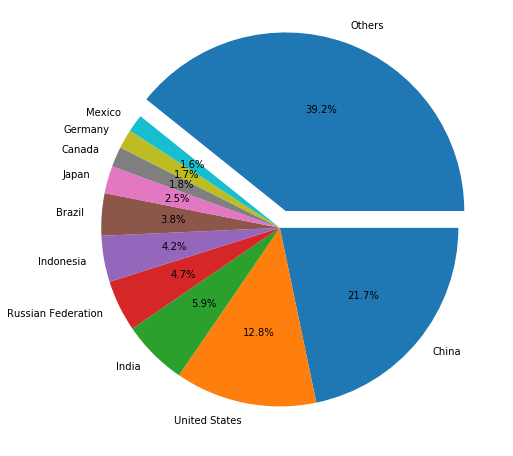

In [31]:
# Creates a list of emission values. Adds the value for 'Others' at the end of the list.
emissions_list = emission_last[1:11]['Grand Total Emissions']
emissions_list = emissions_list.append(world_emissions_val - sum(emissions_list))
emissions_list = emissions_list.tolist()

# Creates a list of the top 10 countries. Adds 'Others' to the list.
countries_list = list(emission_last[1:11].index.values)
countries_list.append('Others')

# Extends out the value for 'Others'.
explode = (0,0,0,0,0,0,0,0,0,0,0.1)

# Plots the chart.
fig = plt.figure(figsize=(8,8))
plt.axis('equal')
plt.pie(emissions_list, labels=countries_list, explode=explode, autopct='%1.1f%%', counterclock=False);

The results are startling! Only 10 out of 186 countries are responsible for over 60% of world's emissions. In fact, China and US emit more than a third of world's greenhouse gases. This shows a significant disparity in emissions.<br><br>Has it been like this over the past decade. Let us see the trend.

In [88]:
country_tableau = countries_list.append('World')
trend = emission[emission['Country'].isin(countries_list)]
trend = trend[['Country','Year','Grand Total Emissions']]
trend_tableau = trend.pivot('Country', 'Year')
trend_tableau.to_excel('Top 10 Data.xlsx')
trend_tableau

1                  Grand Total Emissions                            \
Year                                1990         1991         1992   
Country                                                              
Brazil                        1606.59460   1617.90130   1629.95660   
Canada                         681.92620    602.97980    617.56820   
China                         3218.44540   3158.94920   3306.65320   
Germany                       1111.26660   1068.32820   1022.72890   
India                         1212.02060   1248.47080   1287.54300   
Indonesia                     1025.74400   1064.55030   1103.85390   
Japan                         1116.37770   1127.65920   1139.89680   
Mexico                         477.07090    491.60590    497.50170   
Russian Federation              -1.00000     -1.00000   2831.49630   
United States                 5743.98260   5616.80820   5682.54660   
World                        33937.21432  33280.59763  33295.26431   

1                                                                       \
Year                       1993         1994         1995         1996   
Country                                                                  
Brazil               1642.26440   1661.75280   1688.95000   1698.05520   
Canada                620.05330    640.24930    656.54520    665.41670   
China                3525.60520   3691.71860   4019.32340   4116.74860   
Germany              1011.41870    999.04950    994.45630   1014.42730   
India                1319.93090   1370.37450   1440.39690   1500.13890   
Indonesia            1141.16610   1175.34990   1227.05230   1249.79520   
Japan                1137.74610   1194.89110   1209.93630   1225.89410   
Mexico                502.58350    528.41320    515.60550    537.13050   
Russian Federation   2735.35960   2468.70880   2374.01770   2340.50370   
United States        5811.10570   5900.50960   5957.92170   6121.12450   
World               33408.57548  33628.93115  34309.97387  34980.05164   

1                                                             ...       \
Year                       1997         1998         1999     ...        
Country                                                       ...        
Brazil               1731.28480   1764.39210   1774.90040     ...        
Canada                670.45760    741.43690    707.24000     ...        
China                4083.43500   4170.61840   4102.96570     ...        
Germany               978.52710    963.91530    926.27910     ...        
India                1558.44850   1588.86720   1669.64140     ...        
Indonesia            1433.50170   1355.47430   1359.52320     ...        
Japan                1221.11490   1184.18750   1223.84550     ...        
Mexico                559.33690    593.33910    584.93380     ...        
Russian Federation   2182.47800   2213.30440   2212.58570     ...        
United States        6291.25050   6281.11020   6308.59550     ...        
World               35412.70247  35683.94669  35828.67602     ...        

1                                                                       \
Year                       2003         2004         2005         2006   
Country                                                                  
Brazil               1987.26350   2029.87260   2056.99030   1632.55780   
Canada               1002.77600    979.19400    989.37090    852.38430   
China                5520.37540   6288.66060   6974.05360   7691.83390   
Germany               924.71590    905.71330    887.08980    873.71020   
India                1720.32140   1823.31220   1914.45800   2076.47480   
Indonesia            1570.93500   1600.83170   1583.82630   1967.28400   
Japan                1232.45780   1231.20400   1237.40470   1184.84060   
Mexico                642.50460    652.22140    685.03760    695.87580   
Russian Federation   2249.05930   2135.82490   2163.40390   2060.41280   
United States        6381.66440   6495.93340   6480.32160

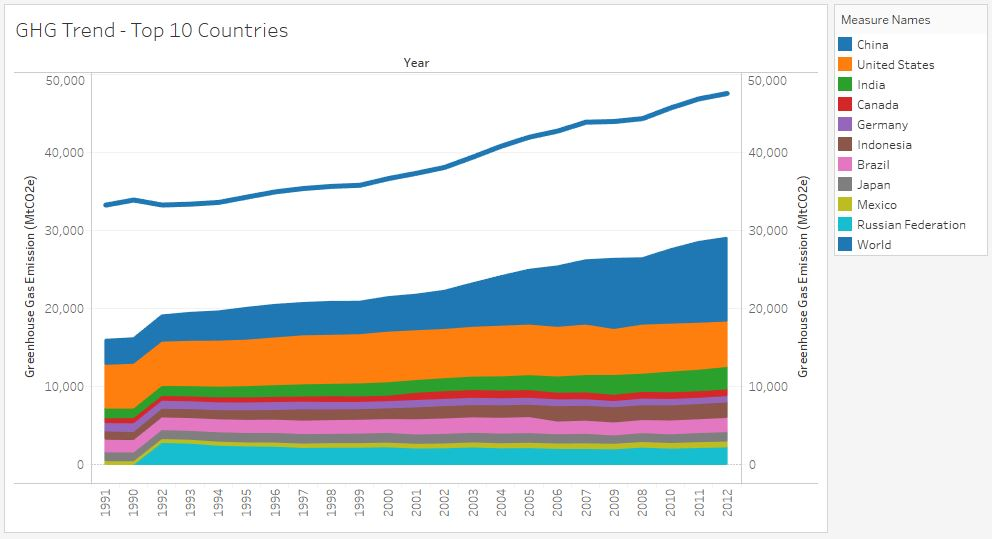

Another interesting result! The emissions from the US has been fairly constant over the last 20 years. We see massive growth for China in GHG emissions. 

### Emission statistics by sector

Having seen the country-wise emission statistics, we also wish to see the sectors which are most responsible for the greenhouse gas emissions. We have taken following sectors into consideration: Energy, Industrial Processes, Agriculture, Land-use Change and Forestry, and Bunker Fuels.<br><br>
First, we begin by changing the datatype of all the sector-emission columns from string to float. To compare different sectors, we again take the last-three year average of their emissions.

In [32]:
# Creates a list of the sectors taken into consideration.
sectors_list = ['Energy (MtCO2e)', 
                'Industrial Processes (MtCO2e)',
                'Agriculture (MtCO2e)', 'Waste (MtCO2e)',
                'Land-Use Change and Forestry (MtCO2)', 
                'Bunker Fuels (MtCO2)']

# Converts all the sectors_list columns from string to to float. Adds the year column as well.
emission_by_sector = emission[sectors_list].apply(lambda s: s.apply(lambda v: float(v)))
emission_by_sector['Year'] = emission['Year']

# Sums the emissions in each sector for each country and finds out the mean over the last 3 years.
emission_by_sector = emission_by_sector[emission['Year'] > 2009]
emission_by_sector = emission_by_sector[['Year']+sectors_list].groupby('Year').agg('sum')
emission_by_sector = emission_by_sector.apply(lambda s: s.mean())
emission_by_sector = emission_by_sector.sort_values()

Again, plot chart seems to be a very good visualizing tool to see the relative emissions of different sectors. Here, we convert the data into structures that the plt.pie() function expects. Then we plot the pie chart.

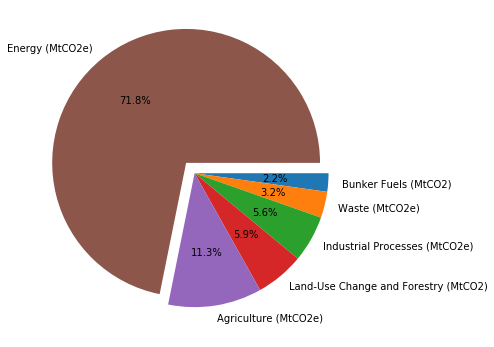

In [33]:
# Plots the pie-chart. Explodes the sector with the highest emission.
emission_sector = emission_by_sector.tolist()
emission_sector_list = list(emission_by_sector.index.values)
explode = (0,0,0,0,0,0.1)
fig = plt.figure(figsize=(6,6))
plt.axis('equal')
plt.pie(emission_sector, labels=emission_sector_list, autopct='%1.1f%%', counterclock=False, explode=explode);

This result is also quite surprising. A lot of people tend to believe that industrial processes are the most polluting but turns out the energy sector is responsible for more than 71% of the greenhouse emissions. The major contributors in the energy sectors are electricity/heat generation and consumption, manufacturing, and transportation. The fact that three of those - electricity, heat, and transportation - are used by common people like ourselves proves that small changes in our lifestyle can lead to big environmental impacts!

### Extending the country-wise analysis

Earlier, we saw how disparate the greenhouse emissions are among the countries. However, it is unfair to not consider the scale at which a country needs the energy - also pretty disparate. Therefore, we bring in two indicators of a country's energy needs - Population and the Gross Domestic Product (GDP). More people or more production, both means more energy needs. Thus, we wish to see how the top emitters change positions when these indicators are considered.

### Socio-economic Data

This file contains the population and GDP of all the countries. Here, we read the data and perform some cleansing to get it ready for our use. Read the data from the CSV file. Fill in all the missing values by -1. The missing values are mostly for really small and undeveloped countries, so it does not affect our analysis. Also, we remove two rows from the data corresponding to a group of countries, namely "European Union (28)", and "European Union (15)".

In [34]:
# Reads the file that contains the Socio-Economic data. Cleans the data.
gdp = pd.read_csv("CAIT Country Socio-Economic Data.csv", encoding = "latin-1")

# Data cleansing
gdp.columns = gdp.iloc[0]
gdp = gdp.iloc[1:]
gdp = gdp.fillna("-1")
gdp = gdp[gdp['Country'] != "European Union (28)"]
gdp = gdp[gdp['Country'] != "European Union (15)"]

Change the data type of Year, Emissions, and GDP from string to a number type (integer or float).

In [35]:
gdp['Year'] = gdp['Year'].apply(lambda v: int(v))
gdp['Population (People)'] = gdp['Population (People)'].apply(lambda v: float(v))
gdp['GDP-PPP (Million Intl$ (2011))'] = gdp['GDP-PPP (Million Intl$ (2011))'].apply(lambda v: float(v))

#### Population

Here we calculate the last three-year (2010, 2011, and 2012) average of the population for each country. We are taking a three-year average to be consistent with the calculation of the emissions. For the sake of easy readability, we also change the format of the data from scientific/exponent notation to the number in millions. However, please note that the dataframe in which the format change is done is purely for printing purpose - it is not used in further calculations.

In [36]:
population_last = gdp[gdp['Year'] > 2009]
population_last = population_last[['Country','Population (People)']].groupby('Country').agg('mean')
population_last = population_last.sort_values('Population (People)', ascending=False)

# Store world's population for later reuse
world_population_val = population_last['Population (People)']['World']

# Show the top five populous countries
population_print = population_last.copy()
population_print['Population (People)'] = population_last['Population (People)'].apply(lambda x: str(round(x/1000000, 2)) + ' million')
population_print[1:].head(5)

,Population (People)
Country,
China,1344.18 million
India,1221.16 million
United States,311.59 million
Indonesia,243.78 million
Brazil,196.93 million


#### GDP

Here we calculate the last three-year (2010, 2011, and 2012) average of GDP-PPP (in international dollars) for each country. We are taking a three-year average to be consistent with the calculation of the emissions. For the sake of easy readability, we also change the format of the data from scientific/exponent notation to the GDP in billions. However, please note that the dataframe in which the format change is done is purely for printing purpose - it is not used in further calculations. We also store world's GDP for later use.

In [37]:
gdp_last = gdp[gdp['Year'] > 2009]
gdp_last = gdp_last[['Country','GDP-PPP (Million Intl$ (2011))']].groupby('Country').agg('mean')
gdp_last = gdp_last.sort_values('GDP-PPP (Million Intl$ (2011))', ascending=False)

# Store world's GDP for later reuse
world_gdp_val = gdp_last['GDP-PPP (Million Intl$ (2011))']['World']

# Show the top five countries by GDP
gdp_print = gdp_last.copy()
gdp_print['GDP-PPP'] = gdp_print['GDP-PPP (Million Intl$ (2011))'].apply(lambda x: str(round(x/1000, 2)) + ' billion')
gdp_print[['GDP-PPP']][1:].head(5)

,GDP-PPP
Country,
United States,15556.21 billion
China,13457.4 billion
India,5823.08 billion
Japan,4418.44 billion
Germany,3406.59 billion


Merge the GDP, Population, and the emissions dataframes into a single dataframe. Here, we perform some cleansing and then merge the above datasets. Also, make two new columns to store the emissions per capita and emissions per capita-GDP. These will be the columns of interest in the extended analysis.

In [38]:
# Cleans the data and merges the dataframes to get the Country, Population and GDP in the same dataframe.
emissions.reset_index(level=0, inplace=True)
population_last.reset_index(level=0, inplace=True)
gdp_last.reset_index(level=0, inplace=True)
gdp_population_emission = pd.merge(emissions, population_last)
gdp_population_emission = pd.merge(gdp_population_emission, gdp_last)

# Calculates the GDP per capita and population per capita. Saves it in a new column.
gdp_population_emission['Emission Per Capita GDP'] = gdp_population_emission['Grand Total Emissions']/gdp_population_emission['GDP-PPP (Million Intl$ (2011))']
gdp_population_emission['Emission Per Capita'] = gdp_population_emission['Grand Total Emissions']/gdp_population_emission['Population (People)']
gdp_population_emission.head(5)

,Country,Grand Total Emissions,Population (People),GDP-PPP (Million Intl$ (2011)),Emission Per Capita GDP,Emission Per Capita
0,China,10153.820200,1.344177e+09,1.345740e+07,0.000755,0.000008
1,United States,5998.224067,3.115942e+08,1.555621e+07,0.000386,0.000019
2,India,2763.586433,1.221156e+09,5.823078e+06,0.000475,0.000002
3,Russian Federation,2175.107567,1.428400e+08,3.219562e+06,0.000676,0.000015
4,Indonesia,1953.245633,2.437808e+08,2.058320e+06,0.000949,0.000008


### Analyzing per capita emissions
Now, we create a horizontal bar chart of the countries which we found to be most polluting. The idea is to see whether the countries which are responsible for the most emissions actually do need those. The need here is equated with the country's population. The vertical line is the world's average.

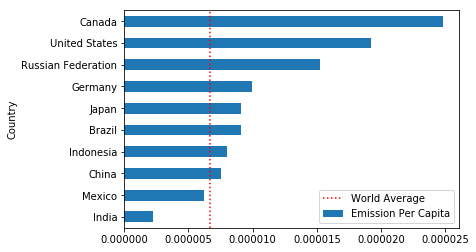

In [39]:
# Extracts the Country and the Emissions Per Capita column. Sorts the data according the to Emissions Per capita and plots the top 10 records.
population_emission_sort = gdp_population_emission[['Country', 'Emission Per Capita']]
population_emission_sort = population_emission_sort.sort_values(by = 'Emission Per Capita', ascending=True)
population_emission_sort.set_index(population_emission_sort['Country'], inplace=True)
population_emission_sort.plot(kind='barh')
threshold = world_emissions_val['World']/world_population_val
plt.axvline(x=threshold, color='red', linestyle='dotted', label='World Average')
plt.legend()
plt.show()

As we can see, even among the top emitters, there is a significant disparity when it comes to emissions per capita. India and China which looked really bad in the above chart fare much better when the population is taken into consideration. In other words, it seems reasonable that more than 30% (China and India) of world's population is emitting close to 28% of the global greenhouse gases. In fact, India is much below the World's average! However, Canada, United States, and the Russia have a huge per capita emissions. This gives a little hint that despite being the developed countries with high standard of living, they are still relying heavily on conventional energy sources.

### Analyzing per capita GDP emissions

Now, we create a horizontal bar chart of the countries which we found to be most polluting. The idea is to see whether the countries which are responsible for the most emissions actually produce something that others can use. Countries which produce themselves and export will naturally have high emissions and importers will have low. The need here is equated with the country's population. The vertical line is the world's average.

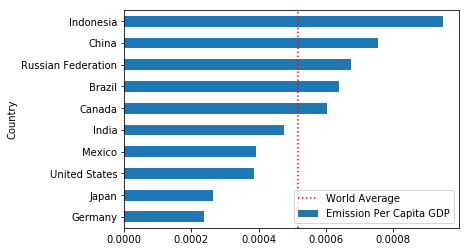

In [40]:
# Extracts the Country and the Emissions Per Capita column. Sorts the data according the to Emissions Per capita and plots the top 10 records.
gdp_emission_sort = gdp_population_emission[['Country', 'Emission Per Capita GDP']]
gdp_emission_sort = gdp_emission_sort.sort_values(by = 'Emission Per Capita GDP', ascending=True)
gdp_emission_sort.set_index(gdp_emission_sort['Country'], inplace=True)
gdp_emission_sort.plot(kind='barh')
threshold = world_emissions_val['World']/world_gdp_val
plt.axvline(x=threshold, color='red', linestyle='dotted', label='World Average')
plt.legend()
plt.show()

Except for a few exceptions, there is a significant change in rankings here. In fact, half of the world's top emitters fall below the World's average when it comes to per GDP. A thing to note that none of these countries have a "really-low" GDP which can artificially inflate the ratio. Some possible reasons may be fairly derived from the analysis.
Countries at the top of this list may have more energy being fed into production (eg. industries) rather than consumption (eg. homes), have a relatively inefficient manufacturing industry, or have a GDP whose majority is contributed by traditional manufacturing and not the service industry. Countries at the bottom may have the opposite.

### Correlation with Rising Sea Level

Earlier, we saw the rising trend of global greenhouse emissions in the last two decades. Here, we read the Sea Level change data from NASA. The data contains some raw fields too, but we are only interested in two of them - Year and Adjusted Sea Level Change. In actual data, the Year is a float type indicating the specific time of the year the measurement was made. As we are only interested in yearly data, we rip off the other part to just get the year. Then, we take a mean of all the data in that year to calculate the average sea level change in that year. Also, the data originally considers the normal sea level at the midpoint of the observations. However, we change the zero level to be the earliest data we have. Finally, we change the year column to pandas datatime instead of a number, for better plotting. 

In [41]:
# Reading the data
header = ["","","Time","","","","","","","","","Sea level change"]
sea_level = pd.read_csv("GMSL_TPJAOS_V4_199209_201708.txt", encoding = "latin-1",skiprows=44, header=None, names=header)

# Changing data type
sea_level['Year'] = sea_level['Time'].apply(lambda v: floor(float(v)))
sea_level['Sea level change'] = sea_level['Sea level change'].apply(lambda v: float(v))

# Calculate average of year's sea level change
sea_level_per_year = sea_level[['Year','Sea level change']]
sea_level_per_year = sea_level_per_year.groupby('Year').agg('mean')

# Adjusting the zero for the sea level change
initial = sea_level_per_year.iloc[0][0]
sea_level_per_year['Sea level change'] = sea_level_per_year['Sea level change'].apply(lambda v: v-initial)

# Changing Year to pandas datetime format for plotting purpose
sea_level_per_year.set_index(pd.to_datetime(sea_level_per_year.index.values, format="%Y"), inplace=True)

# Display sample data
sea_level_per_year.head(5)

,Sea level change
1993-01-01,0.000000
1994-01-01,1.344324
1995-01-01,3.483243
1996-01-01,7.253386
1997-01-01,13.041081


Now that we have both the timeline for the global greenhouse emissions and the rising sea level data. Here, we plot the two timelines on the same figure to get a fair amount of idea about their correlation.

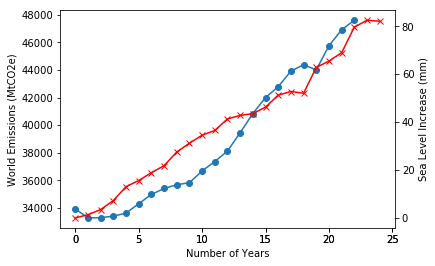

In [42]:
from pylab import figure, show, legend, ylabel

# create the general figure
fig1 = figure()

# and the first axes using subplot populated with data 
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(emission_world['Grand Total Emissions'].tolist(), 'o-')
ylabel("World Emissions (MtCO2e)")

# now, the second axes that shares the x-axis with the ax1
ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2 = ax2.plot(sea_level_per_year['Sea level change'].tolist(), 'xr-')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ylabel("Sea Level Increase (mm)")
ax1.set_xlabel("Number of Years")

plt.show()

As we can see from the above graph, the rise in sea level is highly correlated to the increase in greenhouse emissions. This gives a fairly decent indication of the gravity of the problem. Many low lying places are at huge risk of getting inundated or even disappear in the near future.

### But, who is paying the price?

As we see the sea level rising at a dangerous pace, there are many countries which are at significant risk of losing their land in the near future. We researched and found the countries which are at the most risk by the rising sea level. Below, we read the data to get the ten countries which are at most risk by:
1. Percentage of population affected by increasing sea levels.
2. Number of people affected by increasing sea levels.

Source: https://weather.com/science/environment/news/20-countries-most-risk-sea-level-rise-20140924

In [43]:
# Gets the top 10 countries (percentage of people) affected by increasing sea levels.
risk_top_percentage = pd.read_excel("Risk_Highest_Percentage.xlsx")
risk_top_percentage_list = risk_top_percentage["Country"].head(10).tolist()
risk_top_percentage_list

['Netherlands',
 'Vietnam',
 'Thailand',
 'Japan',
 'Myanmar',
 'Bangladesh',
 'United Arab Emirates',
 'Philippines',
 'Bahrain',
 'Belgium']

In [44]:
# Gets the top 10 countries (number of people) affected by increasing sea levels.
risk_top_population = pd.read_excel("Risk_Highest_Population.xlsx")
risk_top_population_list = risk_top_population["Country"].head(10).tolist()
risk_top_population_list

['China',
 'Vietnam',
 'Japan',
 'India',
 'Bangladesh',
 'Indonesia',
 'Thailand',
 'Netherlands',
 'Philippines',
 'Myanmar']

Now that we have both the countries that emit most greenhouse gases and the countries which are at most risk, we wish to see the overlap (if any) in the two lists. Venn diagram seems to be good visualization to see that. Therefore, here we create two venn diagrams to show the overlap between emitters and price-payers! (Tableau doesn't allow us to use make Venn Diagrams. Therefore, we used Microsoft Excel to make them).

In [45]:
from matplotlib_venn import venn2

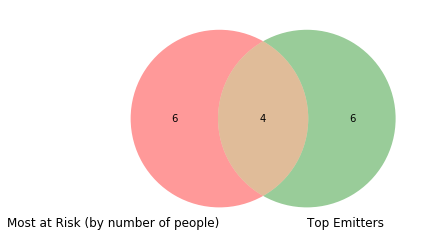

In [46]:
# Gets the top ten contributors for emissions.
top_countries = countries_list[:10]

# Creates 3 sets. One for the top 10 GHG emitters. Second, for top 10 countries affected by increasing sea levels (by percentage).
# Third, for top 10 countries affected by increasing sea levels (by number of people).
emitters = set(top_countries)
top_ten_number_of_people = set(risk_top_population_list)
top_ten_percent_of_people = set(risk_top_percentage_list)

# Creates a venn diagram to see if the top emitters of GHG are the top at risk of increasing sea levels (by number of people).
venn2([top_ten_number_of_people, emitters], ('Most at Risk (by number of people)', 'Top Emitters'))
plt.show()

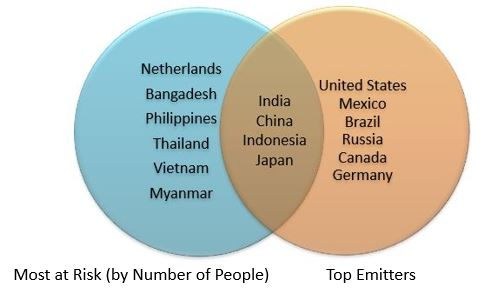

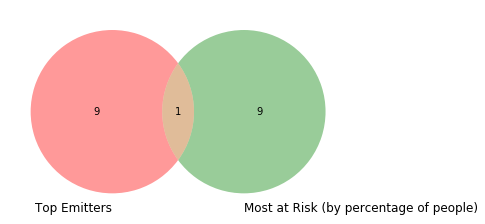

In [47]:
# Creates a venn diagram to see if the top emitters of GHG are the top at risk of increasing sea levels (by percentage of people).
venn2([emitters, top_ten_percent_of_people], ('Top Emitters', 'Most at Risk (by percentage of people)'))
plt.show()

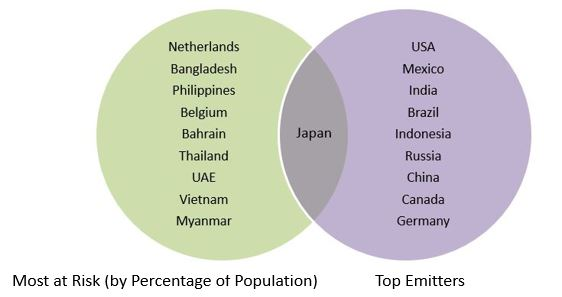

Not much of an overlap. We can note that Japan is the only country that affected by its emissions in both measures. India, China and Indonesia also feature in the list of most number of people affected by rising sea levels. However, large populations in these countries may account for this result.<br><br>
Suprisingly, we see the Netherlands, Philippines, Vietnam, Myanmar and Bangladesh featuring in both lists of top 10 countries affected by rising sea levels (in numbers and percentage of people affected). While the top emitters are not affected massively by their doing, smaller and innocent countries are paying the price for emissions.

### Comparison with Green Fund Contributions

Recently, the US pulled out of the Paris Climate Agreement. It became a great talking point in the country. But was Donald Trump correct in pulling out? How much Carbon Emissions is the US actually accounting for?<br><br>
We pulled out the Green Fund data from Wikipedia to assist our analysis. <br><br>
Read the data from the website and clean it make it more usable. Fill in all the missing values by -1. The missing values are mostly for really small and undeveloped countries, so it does not affect our analysis. Also, remove the '$' and ',' to help in data type conversionfrom string to float.

In [48]:
# Read the Green Fund data from the Wikipedia website. 
green_fund = pd.read_html("https://en.wikipedia.org/wiki/Green_Climate_Fund")

# Data cleansing
green_fund = green_fund[1]
green_fund.columns = green_fund.iloc[0]
green_fund = green_fund.iloc[2:]
green_fund = green_fund.fillna("-1")

# Remove the '<$' signs and the ',' and convert the funding amount announced to float.
green_fund['Announced ($Millions)'] = green_fund['Announced ($Millions)'].str.replace(r'[<$]', '').str.replace(r',', '')
green_fund['Announced ($Millions)'] = green_fund['Announced ($Millions)'].apply(lambda v: float(v))

# Calculates the percentage of funding of the countries participating in the Green Fund.
total = green_fund['Announced ($Millions)'].sum()
green_fund['Percentage'] = green_fund['Announced ($Millions)'].apply(lambda v: v/total)
green_fund.head()

,Country,Announced ($Millions),Signed ($Millions),Signed per capita,GDP per capita,Emissions per capita (tonnes of CO2e),Percentage
2,USA,3000.0,"$3,000",$9.41,"$55,000",17,0.292550
3,Japan,1500.0,"$1,500",$11.80,"$36,000",9,0.146275
4,UK,1211.0,"$1,211",$18.77,"$46,000",7,0.118093
5,France,1035.0,"$1,035",$15.64,"$43,000",5,0.100930
6,Germany,1003.0,"$1,003",$12.40,"$48,000",9,0.097809


In [55]:
# Calculate the Total Greenhouse Gas emissions for the world and for the US.
emissions = emission.loc[emission['Country'] == 'World', 'Grand Total Emissions'].sum()
emissions_usa = emission.loc[emission['Country'] == 'United States', 'Grand Total Emissions'].sum()

# Calculate the what percentage the US has emitted over the last 25 years.
us_percentage_float = emissions_usa/emissions
us_percentage = '{0:.0%}'.format(us_percentage)
us_percentage

'16%'

What do we have here? US pledged 30% of the total amount in the Green Fund but emits only roughly 16% of the total GHG emissions. It may seem to President Trump that this decision is logical.

However, we only have data as far back as 1990. The United States have polluting the environment way before that. It might look easy to infer and say that United States should not be contributing that much too the environment. However, if we consider data as far back as 1850, United States is responsible for almost a third of the excess Carbon Dioxide in the Earth's atmostphere and hence the contrbution of 30% seems justifed.

https://www.nytimes.com/interactive/2017/06/01/climate/us-biggest-carbon-polluter-in-history-will-it-walk-away-from-the-paris-climate-deal.html

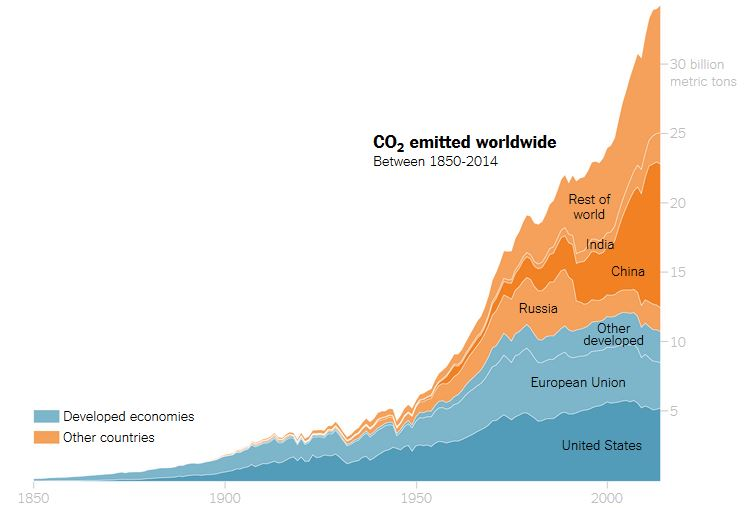